# Network Analysis


In [12]:
import pandas as pd
import numpy as np

df_products=pd.DataFrame(pd.read_csv('products.csv'))
df_products.head()

,id,title,group,salesrank,review_cnt,downloads,rating
0,1,Patterns of Preaching: A Sermon Sampler,Book,396585.0,2,2,5.0
1,2,Candlemas: Feast of Flames,Book,168596.0,12,12,4.5
2,3,World War II Allied Fighter Planes Trading Cards,Book,1270652.0,1,1,5.0
3,4,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289.0,1,1,4.0
4,5,Prayers That Avail Much for Business: Executive,Book,455160.0,0,0,0.0


In [13]:
df_cop=pd.DataFrame(pd.read_csv('copurchase.csv'))
df_cop.head()

,Source,Target
0,1,2
1,1,4
2,1,5
3,1,15
4,2,11


In [14]:
df_book=df_products[(df_products['group']=='Book')
                    &(df_products['salesrank']<=150000)
                    &(df_products['salesrank']!=-1)]

In [15]:
df_book.head()

,id,title,group,salesrank,review_cnt,downloads,rating
11,12,Fantastic Food with Splenda : 160 Great Recipe...,Book,24741.0,12,12,4.5
32,33,"Double Jeopardy (T*Witches, 6)",Book,97166.0,4,4,5.0
38,39,Night of Many Dreams : A Novel,Book,57186.0,22,22,3.5
44,45,Beginning ASP.NET Databases using C#,Book,48408.0,4,4,4.0
73,74,Service Delivery (It Infrastructure Library Se...,Book,27507.0,2,2,4.0


In [16]:
df_cop_book=df_cop[df_cop.Source.isin(df_book.id)
                   &df_cop.Target.isin(df_book.id)]

In [17]:
df_cop_book.head()

,Source,Target
49,12,261
356,74,282
368,77,422
380,79,82
564,117,131


In [18]:
in_degree=pd.DataFrame(df_cop_book.groupby(['Target'])['Source'].size()).reset_index()
in_degree.columns=['id','in_degree']

out_degree=pd.DataFrame(df_cop_book.groupby(['Source'])['Target'].size()).reset_index()
out_degree.columns=['id','out_degree']

all_degree=pd.merge(in_degree,out_degree,on='id',how='outer')
all_degree[np.isnan(all_degree)]=0
all_degree['all_degree']=(all_degree.in_degree+all_degree.out_degree)

all_degree=all_degree.sort_values('all_degree',ascending=False).set_index('id')

all_degree.head()

#book_id 33 and 4429 have highest degrees. 

,in_degree,out_degree,all_degree
id,,,
33,53.0,0.0,53.0
4429,52.0,1.0,53.0
244,36.0,0.0,36.0
5913,22.0,0.0,22.0
302,22.0,0.0,22.0


The product with the highest degree (in degree + out degree) are 33 and 4429. We’re interested in the sub component off all the products that are directly or indirectly associated with products 33 and 4429. The nodes 33 and 4429 and all its subcomponents were visualized by using a package Networkx. In the graph, larger the size of node, larger the degree for the node and darker color means larger degree. The degree of all nodes varies from 1-53. 


**Degree of the Nodes:**<br/> 
A histogram look at the degree distribution of the nodes. Degree of a node determines the # of nodes the parent node is connected directly. We can see that the large number of nodes have lower degree, while only few nodes have degree.

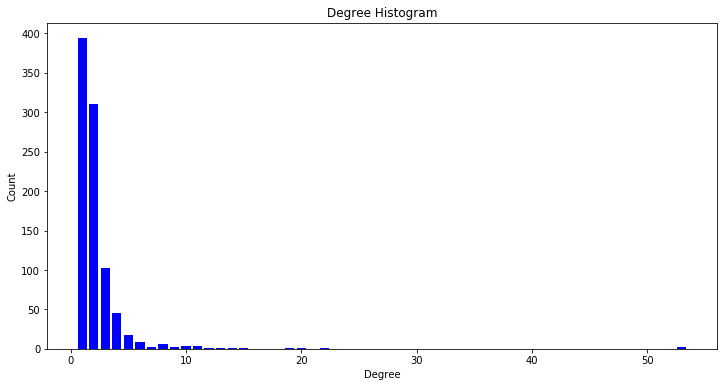

In [38]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
from matplotlib.pyplot import subplots

g = nx.from_pandas_edgelist(df_cop_book, 'Source', 'Target')
sub = nx.node_connected_component(g, 33)

import collections
from bokeh.io import show, output_file
from bokeh.plotting import figure
import seaborn as sns
degree_count=collections.Counter(dict(g.subgraph(sub).degree()).values())

fig, ax = plt.subplots()
plt.bar(degree_count.keys(), degree_count.values(), width=0.8, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

**Centrality of the Nodes:**<br/> 
Centrality counts the number of links held by each node and points at individuals that can quickly connect with the wider network. Centrality here calculates the centrality of all the 904 nodes, and our results vary from 0 to 53, and 53 is the highest centrality.

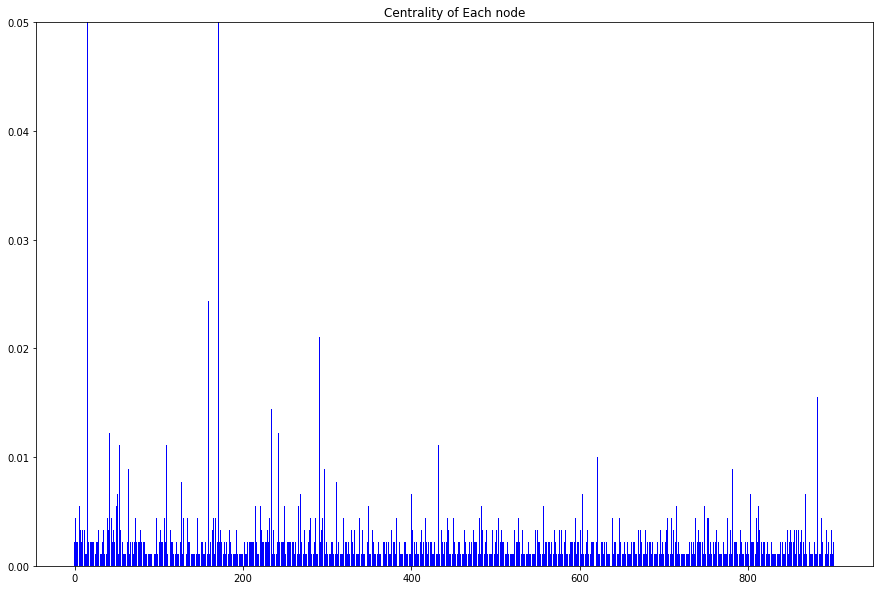

In [39]:
#Centrality of the Nodes.
degree_central=nx.degree_centrality(g.subgraph(sub))
plt.bar(range(len(degree_central)),degree_central.values(),width=0.8, color='b')
fig = plt.gcf()
axes=plt.gca()
fig.set_size_inches(15,10)
axes.set_ylim([0,0.05])
plt.title("Centrality of Each node")
plt.show()

#### Closeness Centrality:
Closeness centrality is defined by is the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes. For this particular subgraph, the closeness centrality looks similar for most of the nodes.

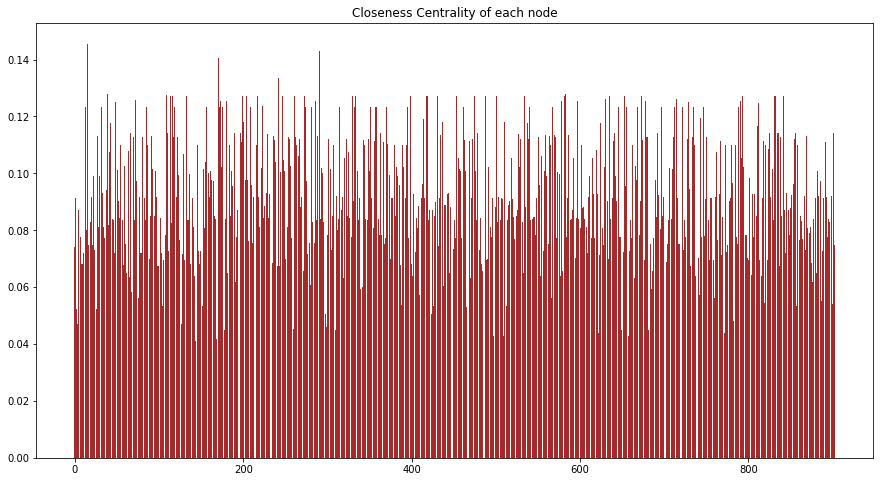

In [32]:
#Closeness Centrality of the Nodes.
close_degree_central=nx.closeness_centrality(g.subgraph(sub))
plt.bar(range(len(close_degree_central)), list(close_degree_central.values()),width=0.8, color='brown')
fig = plt.gcf()
axes=plt.gca()
fig.set_size_inches(15,8)
plt.title("Closeness Centrality of each node")
plt.show()

#### Betweenness Centrality:
Betweenness centrality aims to find the vertex of the given graph. Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass- through v. In the below graph, we can see that few nodes act as the bridge for other nodes to be connected.

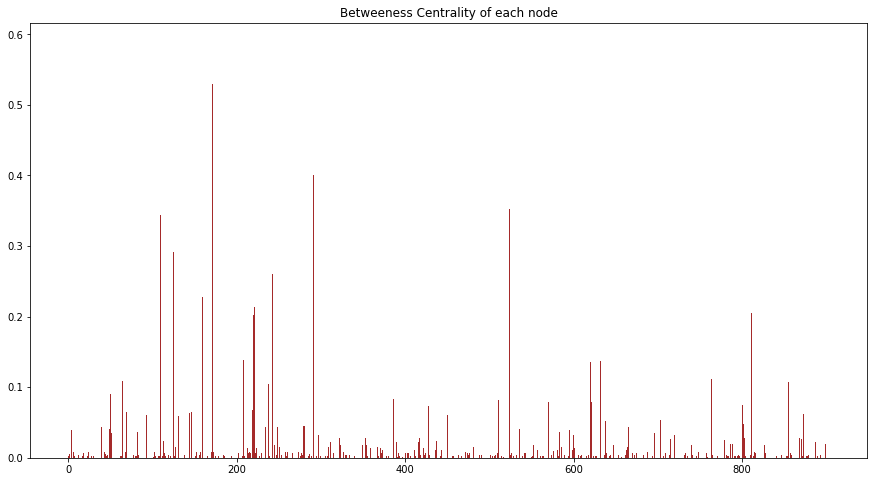

In [33]:
#Between Centrality of the Nodes.
between_degree_central=nx.betweenness_centrality(g.subgraph(sub))
plt.bar(range(len(between_degree_central)), list(between_degree_central.values()),width=0.8, color='brown')
fig = plt.gcf()
axes=plt.gca()
fig.set_size_inches(15,8)
plt.title("Betweeness Centrality of each node")
plt.show()

#### Eigen Vector Centrality:
Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. It is a relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. In the subgraph, 2 nodes have high eigen vector score. Many other nodes have same score of 0.1, indicating that those nodes have similar in value.

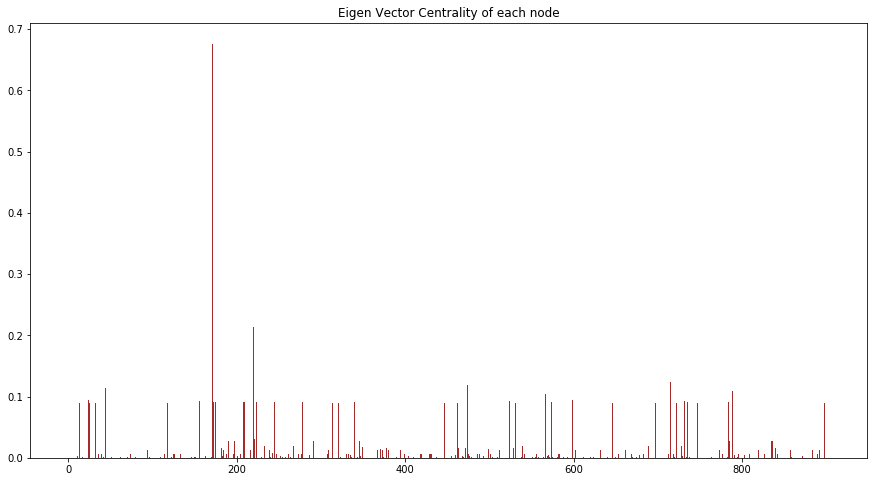

In [227]:
#Eigen Value Centrality of the Nodes.
Eigen_central=nx.eigenvector_centrality_numpy(g.subgraph(subnet))
plt.bar(range(len(Eigen_central)), Eigen_central.values(),width=0.8, color='brown')
fig = plt.gcf()
axes=plt.gca()
fig.set_size_inches(15,8)
plt.title("Eigen Vector Centrality of each node")
plt.show()

#### Hub and Authority Score:
Hub score estimates the nodes value based on outgoing links. The authority score indicates the node value based on incoming links. The hub score and Authority score of the subgraph is same for all nodes, indicating that the no of incoming and outgoing nodes are same.

/Users/yanghaoying/anaconda3/lib/python3.6/site-packages/networkx/algorithms/link_analysis/hits_alg.py:207: ComplexWarning: Casting complex values to real discards the imaginary part
  hubs = dict(zip(G, map(float, h)))
/Users/yanghaoying/anaconda3/lib/python3.6/site-packages/networkx/algorithms/link_analysis/hits_alg.py:208: ComplexWarning: Casting complex values to real discards the imaginary part
  authorities = dict(zip(G, map(float, a)))


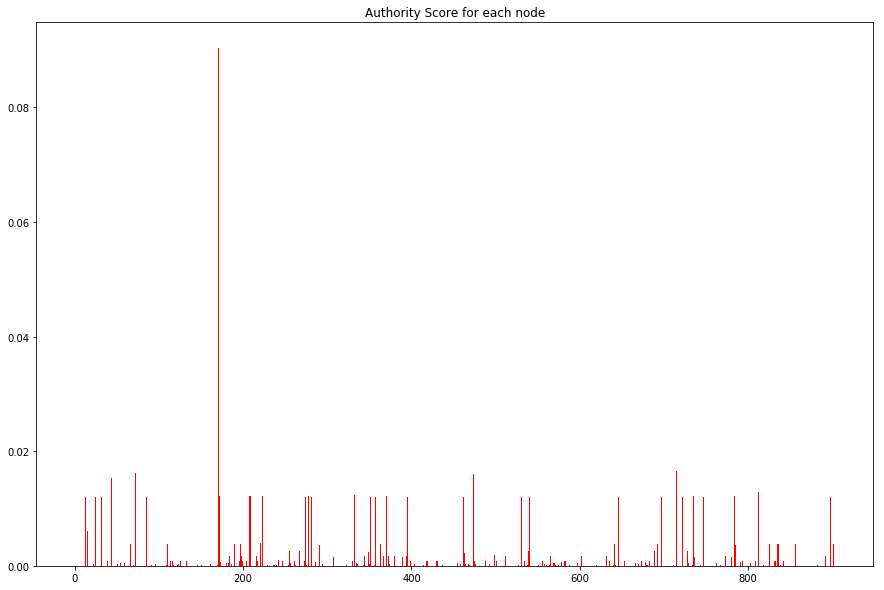

In [34]:
#Authority Score of the Nodes.
Authority=nx.hits_numpy(g.subgraph(sub))
plt.bar(range(len(Authority[1])), Authority[1].values(),width=0.8, color='r')
fig = plt.gcf()
axes=plt.gca()
fig.set_size_inches(15,10)
plt.title("Authority Score for each node")
plt.show()

/Users/yanghaoying/anaconda3/lib/python3.6/site-packages/networkx/algorithms/link_analysis/hits_alg.py:207: ComplexWarning: Casting complex values to real discards the imaginary part
  hubs = dict(zip(G, map(float, h)))
/Users/yanghaoying/anaconda3/lib/python3.6/site-packages/networkx/algorithms/link_analysis/hits_alg.py:208: ComplexWarning: Casting complex values to real discards the imaginary part
  authorities = dict(zip(G, map(float, a)))


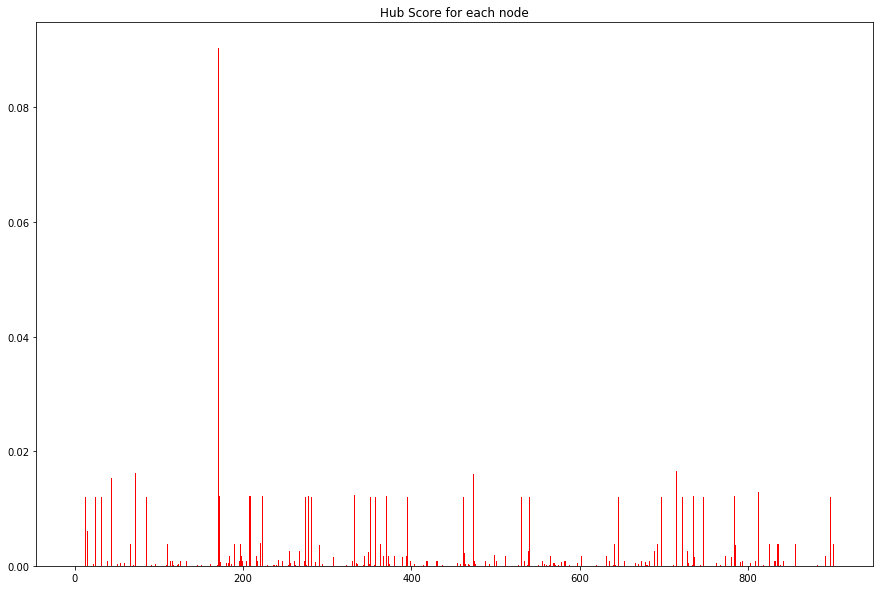

In [35]:
#Hub Score of the Nodes.
hits_score=nx.hits_numpy(g.subgraph(sub))
plt.bar(range(len(hits_score[0])), list(hits_score[0].values()),width=0.8, color='r')
fig = plt.gcf()
axes=plt.gca()
fig.set_size_inches(15,10)
plt.title("Hub Score for each node")
plt.show()

Average Rating, Salesrank and Review Count for the nodes:

In [36]:
x=list(df_cop_book.Source[df_cop_book.Target==33])
y=list(df_cop_book.Target[df_cop_book.Source==33])
neighbor=df_book[df_book.id.isin(x+y)]
neighbor

,id,title,group,salesrank,review_cnt,downloads,rating
223,224,Junebug and the Reverend,Book,138623.0,1,1,5.0
572,577,One Flew Over the Cuckoo's Nest,Book,758.0,316,316,4.5
621,626,Wong's Essentials of Pediatric Nursing (Workbook),Book,61550.0,1,1,4.0
2537,2558,Behold the Beauty of the Lord,Book,118073.0,5,5,5.0
3876,3909,Divorce War! 50 Strategies Every Woman Needs T...,Book,29602.0,16,16,3.0
4031,4068,Lemonade for Sale (MathStart 3),Book,145997.0,3,3,4.5
8318,8396,Grant Takes Command,Book,66666.0,9,9,5.0
8635,8715,Max The Mighty,Book,57499.0,40,40,4.5
9397,9487,Healing ADD : Simple Exercises That Will Chang...,Book,48091.0,14,14,4.0
10688,10787,Baby Einstein: Animal Discovery Cards : Beauti...,Book,141399.0,4,4,5.0


In [224]:
a_salesrank=neighbor.salesrank.mean()
a_rating=neighbor.rating.mean()
a_review=neighbor.review_cnt.mean()
print(a_salesrank,a_rating,a_review)

82153.2641509434 4.10377358490566 21.07547169811321


#### social network visualization

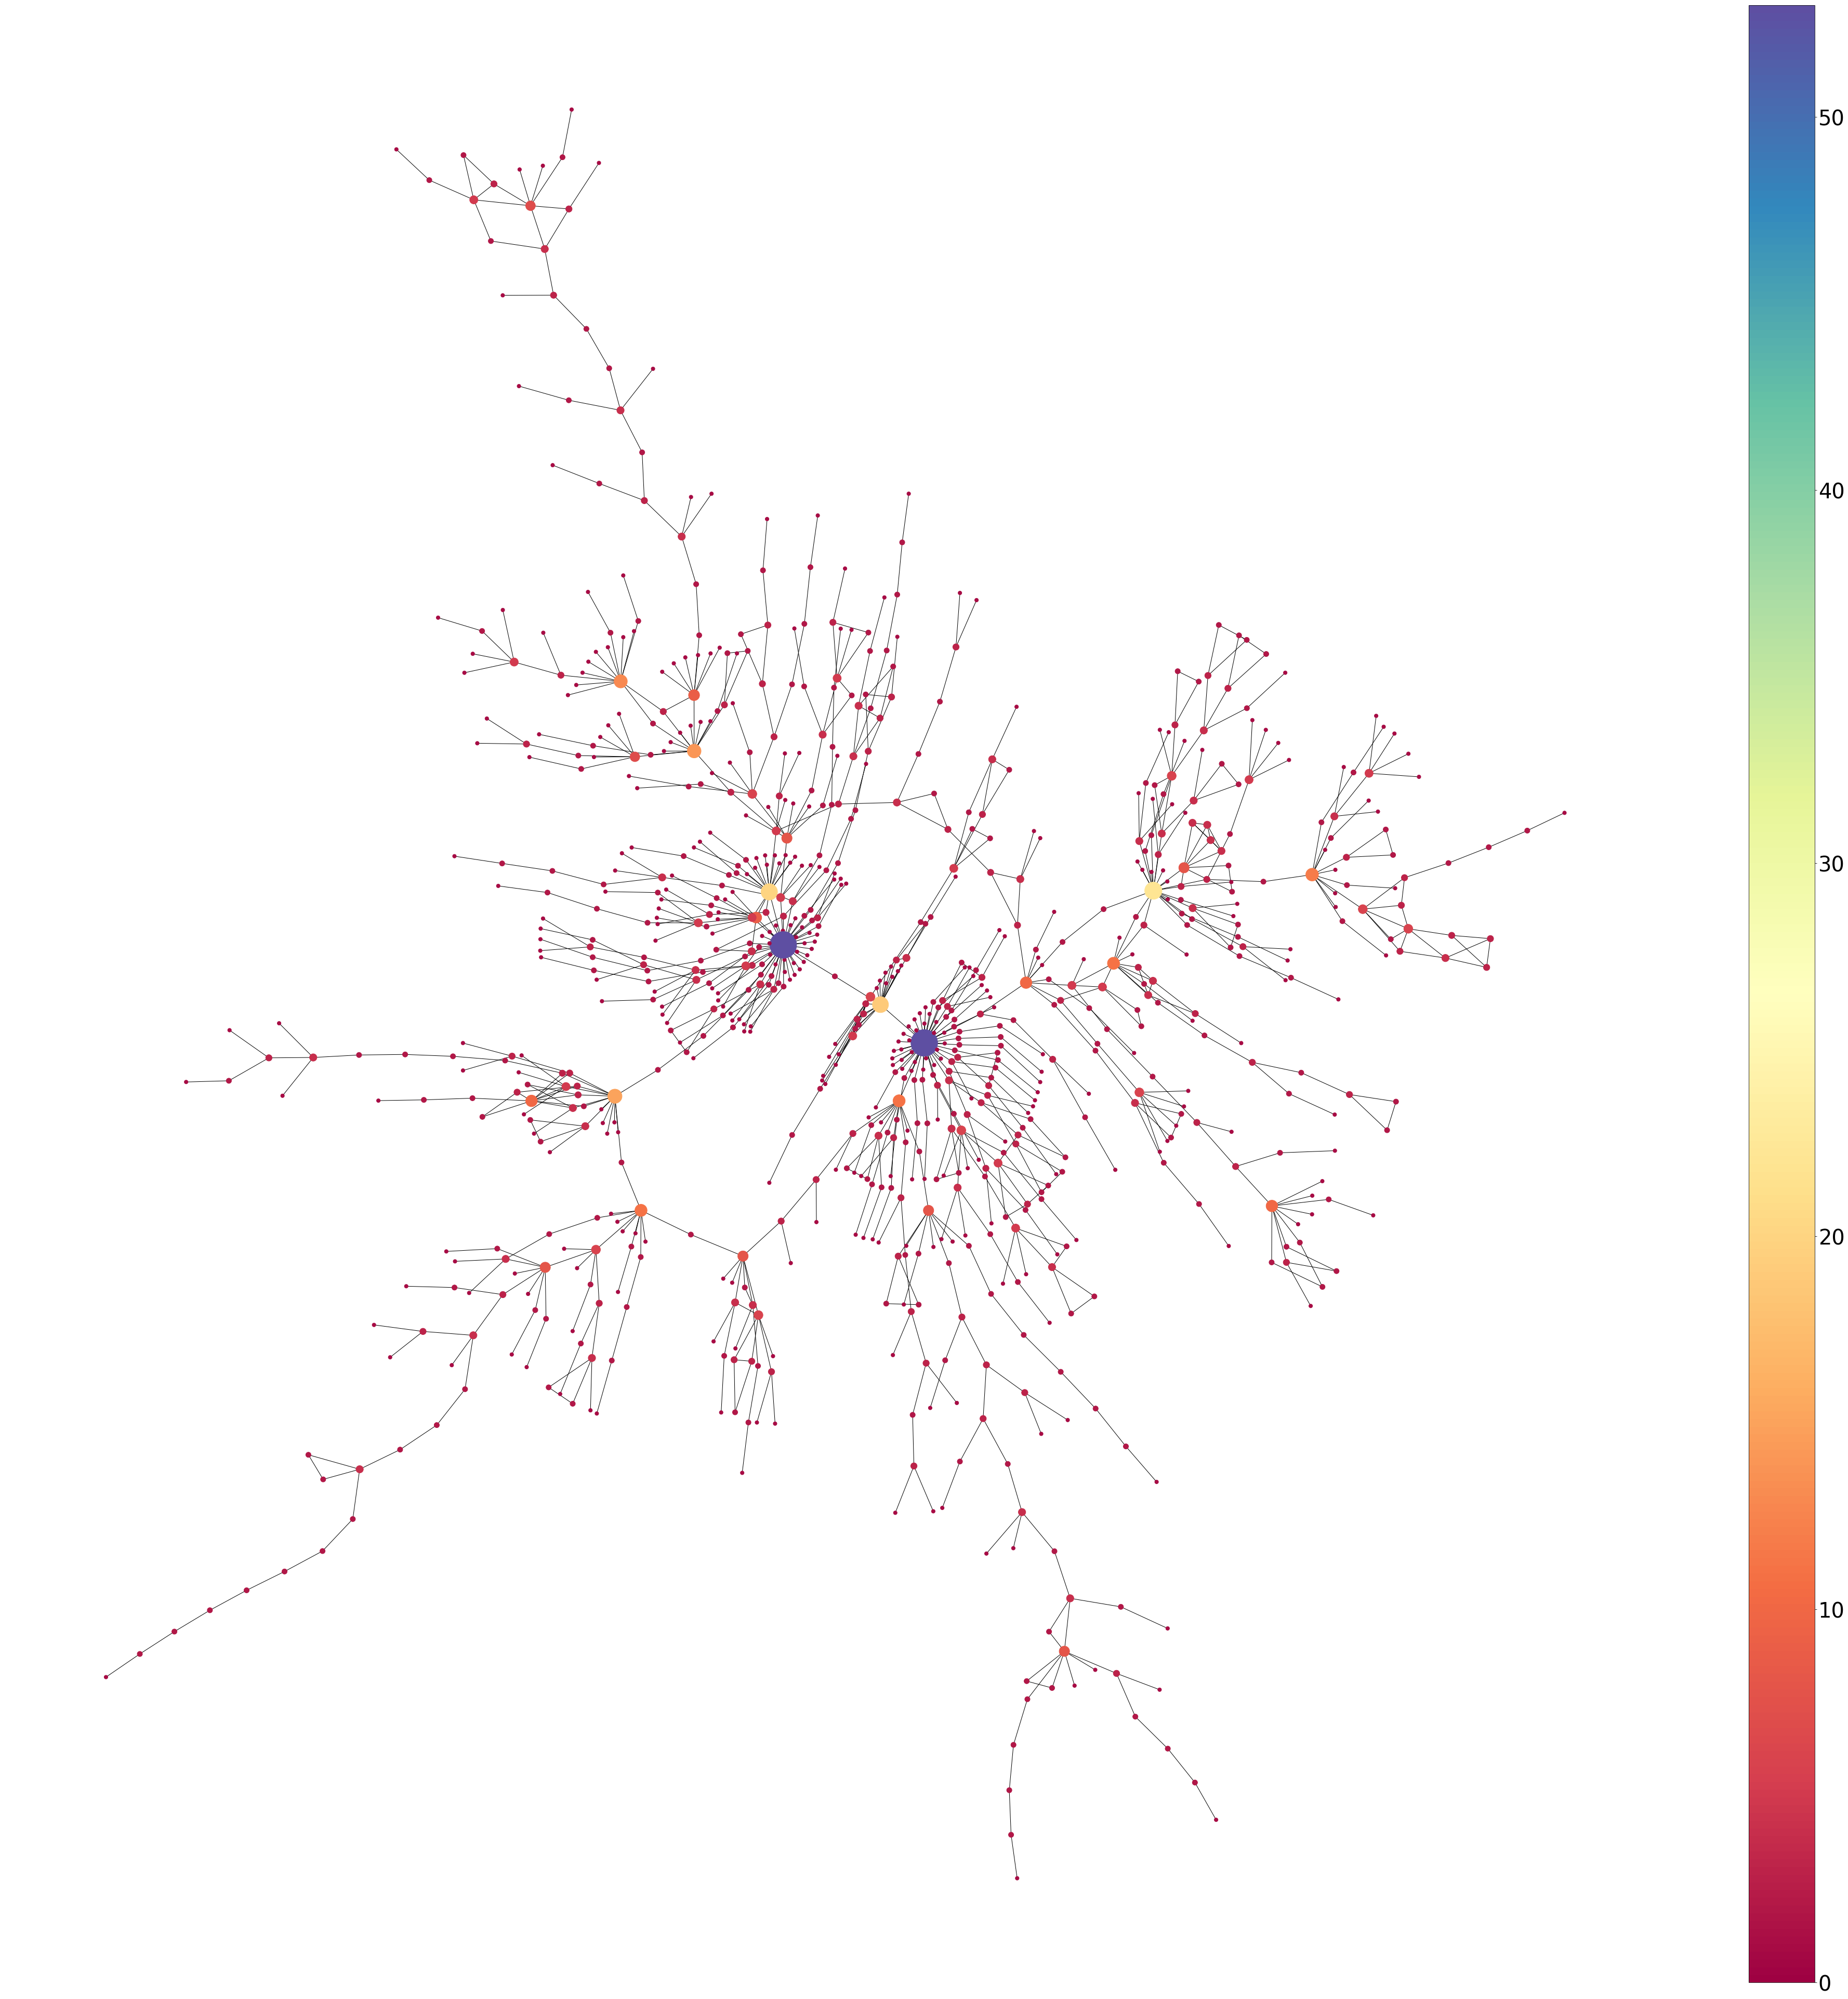

<Figure size 4800x3200 with 0 Axes>

In [24]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
from matplotlib.pyplot import subplots

g = nx.from_pandas_edgelist(df_cop_book, 'Source', 'Target')
fig, ax = subplots()
sub = nx.node_connected_component(g, 33)
pos=nx.kamada_kawai_layout(g.subgraph(sub))

degrees = dict(g.subgraph(sub).degree()) #Dict with Node ID, Degree
nodes = dict(g.subgraph(sub).nodes())
n_color = np.asarray([degrees[n] for n in nodes])

cmap = plt.cm.get_cmap('Spectral') #colormap

G=nx.draw_kamada_kawai(g.subgraph(sub),k=1.2, with_labels = False,
               nodelist=degrees.keys(),node_size=[v*50 for v in degrees.values()]
                     ,cmap=cmap,arrows=True,node_color=n_color,vmin=0, vmax=53)

fig = plt.gcf() #get current figure
fig.set_size_inches(70, 70)
#color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=53))
sm._A = []
cbar=plt.colorbar(sm,aspect=30)
cbar.ax.tick_params(labelsize=40)

plt.figure(dpi=800)
plt.show()

The graph demonstrates 904 vertices. These 904 vertices are the book ids that connected to the book whose id = 33, directly and indirectly. Size of the vertices represents the number of vertices that connected to a vertice; the bigger of the vertice, the more vertices link to it. The distance between each vertice represents how strong the vertices connect to each other; the longer the ties, the weaker the relationship. Therefore, some vertices look like clusters in the middle with short edges, which means these books have strong connections. Some vertices are nodes on the edges, which means weaker connections.